In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [12]:
df = pd.read_parquet("data/TweetSearch_2010.parquet")

In [13]:
len(df.loc[df["text"].str.lower().str.contains("dam")]["text"].to_list())

22

In [17]:
all_data = pd.concat([hashtags2011, hashtags2012, hashtags2013, hashtags2014, hashtags2015, hashtags2016, hashtags2017, hashtags2018, hashtags2019, hashtags2020, hashtags2021, hashtags2022])
#all_data.to_csv("data/TweetSearch.csv", index=False)

In [18]:
len(all_data)

6016878

In [19]:
for i in [hashtags2011, hashtags2012, hashtags2013, hashtags2014, hashtags2015, hashtags2016, hashtags2017, hashtags2018, hashtags2019, hashtags2020, hashtags2021, hashtags2022]:
    print(len(i))

7588
16329
26735
20732
21271
13487
11819
15035
16944
222010
3622990
2021938


# Filtering

## English

In [23]:
# joining year-based dataframes into two different dataframes (because of the explosion of number of tweets after 10/2020)

ht20to22 = pd.concat([hashtags2020, hashtags2021, hashtags2022])
ht11to19 = pd.concat([hashtags2011, hashtags2012, hashtags2013, hashtags2014, hashtags2015, hashtags2016, hashtags2017, hashtags2018, hashtags2019])

# only English language tweets are used because identified keywords are in English

ht20to22 = ht20to22.loc[ht20to22["lang"] == "en"]
#ht20to22

ht11to19 = ht11to19.loc[ht11to19["lang"] == "en"]
#ht11to19

#ht20to22.sample(n=50)["text"].to_list()
#ht11to19.sample(n=50)["text"].to_list()

### Filtering 3.3.2023

#### Filter 1: remove tweets only including general/Tigray conflict related keywords and no other gerd-specific keywords

In [24]:
# filter round 1: remove tweets including one or more of the words in 'list1_2' and none of the words in list 'list1'

list1 = ["gerd", "hydropower", "renaissance dam"]
list1_2 = ["tplf", "tigray", "unityforethiopia", "ethiopiaprevails"]

# choosing tweets that mention one of the irrelevant keywords

filter_gerd1 = ht20to22.loc[ht20to22["text"].str.lower().str.contains("|".join(list1_2), regex=True)]

# out of those (above), choose the tweets that (also) mention one of the relevant 

temp_filter1 = filter_gerd1.loc[filter_gerd1["text"].str.lower().str.contains("|".join(list1), regex=True)]

filter_gerd1 = pd.concat([temp_filter1, filter_gerd1]).drop_duplicates(keep=False)

# concat and drop_duplicated to perform 'ht20to22 - filter_gerd1' (remove values in filter_gerd1 from ht20to22)

filtered1 = pd.concat([ht20to22, filter_gerd1]).drop_duplicates(keep=False)

In [18]:
filter_gerd1.sample(n=20)["text"].to_list()

["Its crucial for int'l leaders at this years #AUEUSummit to discuss the crimes being committed in #Tigray. For almost 500 days #Tigray|ans across Ethiopia have endured mass drone strikes, unlawful detention in concentration camps &amp; a man made famine. #AbiytoICC @sorayarr_ @FNyusi",
 'I thought the Junta is gone? This mf is confused! \nWho let the 🐕 🐕 out 😂😂\n#UnityForEthiopia 🦗🦗 https://t.co/j76cHJoPy9',
 'Only 180 of 3,000 #Somali recruits deployed by #Eritrea to #Ethiopia’s #Tigray survived the conflict, who are currently being treated at a hospital in Mekelle, Somali MP Mahad Salad said on Monday. #Somalia’s gov’t denies presence of its troops in Tigray. https://t.co/Hb5BtpabXe',
 '#Tigray|an families had to bury their children because of weaponized starvation tactics in 1980s. History is repeating itself now. Please take action to stop #TigrayFamine. #TigrayGenocide #EUActNow @EU_Commission @EUCouncilPress @EU2020DE https://t.co/0aqf0QGYso',
 'The IC is responsible for what wi

In [19]:
len(filter_gerd1)

4745468

In [20]:
filtered1["text"].head().to_list()

['#Nile River Valley and the #Indus River Basin are the cradle and seat of civilization. People have lived and farmed in their fertile floodplains since inception of civilisation. \n\nLooking at the night map what is the major difference between Nile and Indus ? Will answer later! https://t.co/yKJo1X4eqg',
 '#Nile River Valley and the Indus River Basin are the cradle and seat of civilization. People have lived and farmed in their fertile floodplains for millennia. \n\nLooking at the night map what  is the major difference between Nile and Indus ? Like to know ! Will answer later',
 'Happy New Year! Taking swing lessons for the first time from Dad at the driving range on New Year’s Day...\n\n#drcarsonliu #bariatricsurgery #heartburnrelief #herniasurgery #gerd #hiatalhernia #hiatalherniarepair… https://t.co/T1zU0Epm17',
 "Many people have misconceptions about the relationship between #hiatalhernias and #GERD.  Let's discuss how these two painful conditions are connected: https://t.co/TVZ

In [25]:
print("tweets left, original amount, tweets left (%)")
print(len(filtered1), len(ht20to22), len(filtered1)/len(ht20to22))

tweets left, original amount, tweets left (%)
256820 5002288 0.051340506584187075


#### Filter 2A: using 'filtered1', remove tweets containing at least one medical keyword (2020-2022)

In [26]:
# filter round 2: remove tweets including at least one of the (medical) words in list 'list2'

list2 = ["hernia", "surgery", "heartburn", "chronicpain", "chronic pain", "chronicillness", "chronic illness", "esophagus", "esophageal", "disorder", "#west #nile virus"]

temp_filter2a = filtered1.loc[filtered1["text"].str.lower().str.contains("|".join(list2), regex=True)]

filtered2a = pd.concat([temp_filter2a, filtered1]).drop_duplicates(keep=False)

In [80]:
filtered2a.sample(n=20)["text"].to_list()

['bijiga_defaRT @DailyNewsEgypt: #GERD’s reservoir reaches 7bn cbm, no reason for fear: Expert  \n\nRead more: https://t.co/bhiCSPAqnu\n\n#Egypt #Ethiopia https://t.co/SFROW8jUNO',
 '#GERD does not harm neither Egypt nor Sudan; instead, it will bring an enormous benefit for the regional integration and development for East &amp; North Africa. #ItIsMyDam #FillTheDam @DominicRaab @_AfricanUnion @Presidence_RDC @AbiyAhmedAli @AlsisiOfficial @MfaEgypt…',
 'Ethiopia Set to Start Generating Power from Blue Nile Dam https://t.co/VJdIfr5Dyv.\nThis is good news for #Ethiopia and #Africa. With the #GERD producing #electricity, the #economy will develop, reducing #poverty and bringing #stability to the region.',
 'when the housemaid is told to leave tomorrow so she have to break some stuff at the household and neighborhoods... \n#TrumpIsACoward #Ethiopia #GERD #habesha #Egypt #AddisAbeba  #ItsMyDam #EthiopiaNileRights https://t.co/QuwB28nyIq',
 'The Suez Canal opened in 1869 on this day.  Here is

In [27]:
print("tweets left, original amount, tweets left (%), tweets reduced from last round (%), tweets removed (number)")
print(len(filtered2a), len(ht20to22), len(filtered2a)/len(ht20to22), len(filtered2a)/len(filtered1), len(temp_filter2a))

tweets left, original amount, tweets left (%), tweets reduced from last round (%), tweets removed (number)
255722 5002288 0.05112100702718436 0.9957246320380033 1098


In [70]:
temp_filter2a.sample(n=15)["text"].to_list()

['Factors that can contribute to #GERD: Hiatal hernia, Obesity, Zollinger-Ellison syndrome, Hypercalcemia, Scleroderma, Visceroptosis.',
 'Can cannabis help with gastrointestinal issues?\n\nhttps://t.co/jlFq3MLMWS #cannabis #gastrointestinal #disorders #illness #crohns #colitis #ibs #immunesystem #GERD #inflammation',
 '#ThrowbackThursday Watch our esophageal cancer awareness commercial: ""Sometimes #heartburn isn\'t JUST an inconvenience."" [VIDEO] https://t.co/8BWFX62lsf  \n\n#EsophagealCancer #EsophagealCancerAwareness #AllPeriwinkleEverything™ #tbt #cancer #cancerawareness #awareness #GERD',
 'Could you have sleep apnea and not even know it? https://t.co/nmiL3ElBn4 #sleep #sleepapnea #snoring #nocturia #bruxism #depression #hypertension #afib #GERD #heartburn #PCOS #Fibromyalgia #dementia #diabetes #allergies',
 'Factors that can contribute to #GERD: Hiatal hernia, Obesity, Zollinger-Ellison syndrome, Hypercalcemia, Scleroderma, Visceroptosis.',
 'New @NEJM publication by Michael V

#### Filter 2B: remove tweets containing at least one medical keyword (2011-2019)

In [28]:
# filter round 2B: remove tweets including at least one of the (medical) words in list 'list2'

temp_filter2b = ht11to19.loc[ht11to19["text"].str.lower().str.contains("|".join(list2), regex=True)]

filtered2b = pd.concat([temp_filter2b, ht11to19]).drop_duplicates(keep=False)

In [77]:
filtered2b.sample(n=50)["text"].to_list()

['@skip_conover U should come to the Red Sea #swim w/ Dolphins http://t.co/vNskF1B @MeltemArikan #Egypt #Nile @jessi_archetype @SallyHard',
 'The hotel was thronged with passengers to India, with rosy, blooming English ladies and crowds of my https://t.co/P9QsdCAVlZ #nile #africa',
 '#Ethiopia, #Egypt and #Sudan to assess environmental and social impact of Grand Ethiopian Renaissance Dam (#GERD) http://t.co/IXRA7YsJA3',
 'Let’s not fool ourselves! What do you have? Rivers, agriculture, Gas? If #Tigray is self sufficient, why are you crying about the blockade of supplies from #Amhara region.? You all need each other and more so #Tigray than others. https://t.co/m2UjUTjdSB',
 '(Evening Times):#Nile #Rodgers opens up about cancer fight ahead of Glasgow gig : He beat the disease for a.. https://t.co/h6cafsrlqS',
 'Just thoughts ! #relax #shooting #onset #nile #aswan #egypt #beauty #musicvideo #retinafilms… http://t.co/7rvhZLEwcR',
 "There's nowhere on earth quite like Abuna Yemata Guh.\nAb

In [30]:
print("tweets left, original amount, tweets left (%), tweets removed (number)")
print(len(filtered2b), len(ht11to19), len(filtered2b)/len(ht11to19), len(temp_filter2b))

tweets left, original amount, tweets left (%), tweets removed (number)
107528 117818 0.912661902256022 10290


#### Filter 3: remove tweets containing at least one music/tourism related keyword (2011-2022)

In [33]:
# concat results from 2A and 2B to be used in this step

filtered2 = pd.concat([filtered2a, filtered2b])

list3 = ["deathmetal", "death metal", "photography", "rodgers", "drummer", "spacevine", "cruise", "sunset"]

temp_filter3 = filtered2.loc[filtered2["text"].str.lower().str.contains("|".join(list3), regex=True)]

filtered3 = pd.concat([temp_filter3, filtered2]).drop_duplicates(keep=False)
filtered3

,created_at,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,user.public_metrics.following_count,user.public_metrics.tweet_count,user.public_metrics.listed_count,user.url,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description
1,2020-01-01T23:44:11.000Z,1212519922993111040,14450089,1212519922993111040,everyone,#Nile River Valley and the #Indus River Basin ...,en,0,0,2,...,2109,50523,38,https://t.co/B9zzZrNsFU,14450089,ilatif,https://pbs.twimg.com/profile_images/161942020...,2008-04-20T08:07:55.000Z,Paris,A strategic analyst keenly interested in our g...
2,2020-01-01T23:41:12.000Z,1212519169725472769,14450089,1212519169725472769,everyone,#Nile River Valley and the Indus River Basin a...,en,0,1,2,...,2109,50523,38,https://t.co/B9zzZrNsFU,14450089,ilatif,https://pbs.twimg.com/profile_images/161942020...,2008-04-20T08:07:55.000Z,Paris,A strategic analyst keenly interested in our g...
9,2020-01-01T20:39:50.000Z,1212473527426830338,1128019934422892544,1212473527426830338,everyone,"Happy New Year, Addis Hiking Family! \nWe had ...",en,1,1,9,...,40,204,4,None,1128019934422892544,addis_hiking,https://pbs.twimg.com/profile_images/156858721...,2019-05-13T19:31:24.000Z,Äthiopien,"It's all about adventure, admiring the beauty ..."
12,2020-01-01T19:33:18.000Z,1212456783161298944,451232651,1212456783161298944,everyone,#LandOfOrigins #Ethiopia \nplease follow #Trav...,en,2,0,10,...,1493,14909,35,https://t.co/lNhwn36qYJ,451232651,febewol7,https://pbs.twimg.com/profile_images/162193715...,2011-12-31T05:53:30.000Z,United States,#Ethiopia 24/7 | Music Enthusiast| 100% ETHIOP...
13,2020-01-01T16:01:45.000Z,1212403548048285696,451232651,1212403548048285696,everyone,The colorful Timkat festivity(Ethiopian Epipha...,en,0,0,5,...,1493,14909,35,https://t.co/lNhwn36qYJ,451232651,febewol7,https://pbs.twimg.com/profile_images/162193715...,2011-12-31T05:53:30.000Z,United States,#Ethiopia 24/7 | Music Enthusiast| 100% ETHIOP...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16909,2019-12-31T09:12:00.000Z,1211938040593231872,1180889598853029892,1211938040593231872,everyone,#Nile tradesman https://t.co/z5LSCHByqj,en,0,0,0,...,242,1356,0,None,1180889598853029892,DJappyPhotos,https://pbs.twimg.com/profile_images/121172121...,2019-10-06T16:56:45.000Z,None,Some of my photos for the world to see - pleas...
16910,2019-12-31T08:31:52.000Z,1211927943041044486,14337796,1211927943041044486,everyone,Kingdom by the Nile.\n.\n.\n.\n.\n.\n#🇪🇬 #medi...,en,0,0,1,...,820,1148,17,https://t.co/UfbSols4WE,14337796,rayshan,https://pbs.twimg.com/profile_images/378800000...,2008-04-09T01:09:26.000Z,San Francisco,Building infrastructure that builds the next g...
16934,2019-12-31T07:56:59.000Z,1211919162202820608,1081876641138143232,1211571560177385473,everyone,@Dawit99910437 @Emuye06 @speed_of_trust The pp...,en,0,0,0,...,821,20813,0,None,1081876641138143232,the_curious_2,https://pbs.twimg.com/profile_images/136089916...,2019-01-06T11:34:26.000Z,Vereinigte Staaten,Views are personal ...
16937,2019-12-31T06:03:00.000Z,1211890476284030976,3233487513,1211890476284030976,everyone,Such an exciting experience! An honor to have ...,en,0,0,0,...,58,679,10,None,3233487513,Chef_Yohanis,https://pbs.twimg.com/profile_images/595237017...,2015-05-04T14:30:47.000Z,None,None


In [34]:
print("tweets left, original amount, tweets left (%), tweets removed (number)")
print(len(filtered3), len(filtered2), len(filtered3)/len(filtered2), len(temp_filter3))

tweets left, original amount, tweets left (%), tweets removed (number)
354272 363250 0.9752842395044735 8978


In [ ]:
temp_filter3["text"].sample(n=10).to_list()

In [148]:
filtered3

,created_at,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,user.public_metrics.following_count,user.public_metrics.tweet_count,user.public_metrics.listed_count,user.url,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description
1,2020-01-01T23:44:11.000Z,1212519922993111040,14450089,1212519922993111040,everyone,#Nile River Valley and the #Indus River Basin ...,en,0,0,2,...,2109,50523,38,https://t.co/B9zzZrNsFU,14450089,ilatif,https://pbs.twimg.com/profile_images/161942020...,2008-04-20T08:07:55.000Z,Paris,A strategic analyst keenly interested in our g...
2,2020-01-01T23:41:12.000Z,1212519169725472769,14450089,1212519169725472769,everyone,#Nile River Valley and the Indus River Basin a...,en,0,1,2,...,2109,50523,38,https://t.co/B9zzZrNsFU,14450089,ilatif,https://pbs.twimg.com/profile_images/161942020...,2008-04-20T08:07:55.000Z,Paris,A strategic analyst keenly interested in our g...
9,2020-01-01T20:39:50.000Z,1212473527426830338,1128019934422892544,1212473527426830338,everyone,"Happy New Year, Addis Hiking Family! \nWe had ...",en,1,1,9,...,40,204,4,None,1128019934422892544,addis_hiking,https://pbs.twimg.com/profile_images/156858721...,2019-05-13T19:31:24.000Z,Äthiopien,"It's all about adventure, admiring the beauty ..."
12,2020-01-01T19:33:18.000Z,1212456783161298944,451232651,1212456783161298944,everyone,#LandOfOrigins #Ethiopia \nplease follow #Trav...,en,2,0,10,...,1493,14909,35,https://t.co/lNhwn36qYJ,451232651,febewol7,https://pbs.twimg.com/profile_images/162193715...,2011-12-31T05:53:30.000Z,United States,#Ethiopia 24/7 | Music Enthusiast| 100% ETHIOP...
13,2020-01-01T16:01:45.000Z,1212403548048285696,451232651,1212403548048285696,everyone,The colorful Timkat festivity(Ethiopian Epipha...,en,0,0,5,...,1493,14909,35,https://t.co/lNhwn36qYJ,451232651,febewol7,https://pbs.twimg.com/profile_images/162193715...,2011-12-31T05:53:30.000Z,United States,#Ethiopia 24/7 | Music Enthusiast| 100% ETHIOP...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16909,2019-12-31T09:12:00.000Z,1211938040593231872,1180889598853029892,1211938040593231872,everyone,#Nile tradesman https://t.co/z5LSCHByqj,en,0,0,0,...,242,1356,0,None,1180889598853029892,DJappyPhotos,https://pbs.twimg.com/profile_images/121172121...,2019-10-06T16:56:45.000Z,None,Some of my photos for the world to see - pleas...
16910,2019-12-31T08:31:52.000Z,1211927943041044486,14337796,1211927943041044486,everyone,Kingdom by the Nile.\n.\n.\n.\n.\n.\n#🇪🇬 #medi...,en,0,0,1,...,820,1148,17,https://t.co/UfbSols4WE,14337796,rayshan,https://pbs.twimg.com/profile_images/378800000...,2008-04-09T01:09:26.000Z,San Francisco,Building infrastructure that builds the next g...
16934,2019-12-31T07:56:59.000Z,1211919162202820608,1081876641138143232,1211571560177385473,everyone,@Dawit99910437 @Emuye06 @speed_of_trust The pp...,en,0,0,0,...,821,20813,0,None,1081876641138143232,the_curious_2,https://pbs.twimg.com/profile_images/136089916...,2019-01-06T11:34:26.000Z,Vereinigte Staaten,Views are personal ...
16937,2019-12-31T06:03:00.000Z,1211890476284030976,3233487513,1211890476284030976,everyone,Such an exciting experience! An honor to have ...,en,0,0,0,...,58,679,10,None,3233487513,Chef_Yohanis,https://pbs.twimg.com/profile_images/595237017...,2015-05-04T14:30:47.000Z,None,None


#### Investigating results from rounds 1-3 & saving filtered dataframe (3.3.2023)

In [37]:
temp_df = get_daily_tweet_counts(filtered3)

In [38]:
temp_df.columns

Index(['created_at', 'id', 'author_id', 'conversation_id', 'reply_settings',
       'text', 'lang', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'possibly_sensitive',
       'referenced_tweets.id', 'referenced_tweets.type', 'in_reply_to_user_id',
       'user.public_metrics.followers_count',
       'user.public_metrics.following_count',
       'user.public_metrics.tweet_count', 'user.public_metrics.listed_count',
       'user.url', 'user.id', 'user.username', 'user.profile_image_url',
       'user.created_at', 'user.location', 'user.description', 'day', 'count'],
      dtype='object')

In [39]:
# save temp_df to data/filtered_data0303 as csv because parquet does not accept some objects in dataframe


temp_df.to_csv("data/filter/filtered_data0303.csv")

In [ ]:
temp_df

# Functions

## Get daily tweet counts

In [40]:
# 'df' needs to be a dataframe of tweets that has a column "created_at" with timestamp starting wiht "yyy-mm-dd"
# returns a dataframe that contains all original columns with an added column called "count" which tells how many tweets were posted that day
# returned dataframe also includes column "day" that has string in format "yyyy-mm-dd"

def get_daily_tweet_counts(df):
    
    import pandas as pd
    
    # reset index to be able to use below for clause
    
    df = df.reset_index(drop=True)
    
    # makes a column "day" with string "yyy-mm-dd"
    
    days = []

    for i in range(len(df)):
        days.append(df["created_at"][i][:10])

    df["day"] = days
    
    # get "count" (number of tweets) for each day in the dataframe
    # change indexing so that there are two columns, "day" and "count"
    
    days_counts = pd.DataFrame(df["day"].value_counts())
    days_counts = days_counts.reset_index()
    days_counts = days_counts.rename(columns={"index" : "day", "day" : "count"}) 
    
    # merge days_counts with df to add corresponding count of daily tweets to each tweet
    
    ret = pd.merge(df, days_counts, how="left", on="day")
    
    return ret

## Get plot days

In [40]:
def get_plot_days(df):
    
    import pandas as pd
    
    # reset index to be able to use below for clause
    
    df = df.reset_index(drop=True)
    
    # makes a column "day" with string "yyy-mm-dd"
    
    days = []

    for i in range(len(df)):
        days.append(df["created_at"][i][:10])

    df["day"] = days
    
    # get "count" (number of tweets) for each day in the dataframe
    # change indexing so that there are two columns, "day" and "count"
    
    days_counts = pd.DataFrame(df["day"].value_counts())
    days_counts = days_counts.reset_index()
    days_counts = days_counts.rename(columns={"index" : "day", "day" : "count"}) 
    
    return days_counts

# Plots

## Yearly distribution of tweets and their languages 2011-2022

In [ ]:
# counting frequencies of the languages

hashtags2011["lang"].value_counts()

en     5940
ar      499
nl      197
qme     165
in      160
und      95
pt       79
es       68
de       66
tl       53
qht      51
fr       42
tr       32
ja       28
et       13
it       11
sv       11
ht       11
ca        9
th        9
no        8
ro        8
da        5
fi        5
cs        4
cy        4
pl        3
hi        3
eu        2
ne        1
hu        1
lt        1
ru        1
lv        1
am        1
iw        1
Name: lang, dtype: int64

In [ ]:
# creating dataframe of the language counts

year = 2011
df_lang = hashtags2011["lang"].value_counts().rename_axis("language").to_frame(year)
df_lang.head()
#index lang

,2011
language,
en,5940
ar,499
nl,197
qme,165
in,160


In [ ]:
# adding the rest of the years to the dataframe

for i in hashtags:
    year += 1
    df_lang = pd.merge(df_lang, i["lang"].value_counts().rename_axis("language").to_frame(year), how="outer", on="language")

In [ ]:
df_lang.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
language,,,,,,,,,,,,
en,5940.0,12478.0,21652.0,15213.0,16881.0,10500.0,9584.0,12360.0,13210.0,179941.0,3139672.0,1682675.0
ar,499.0,464.0,962.0,900.0,336.0,208.0,109.0,172.0,128.0,1925.0,7597.0,5463.0
nl,197.0,104.0,60.0,41.0,67.0,58.0,28.0,18.0,12.0,237.0,9638.0,9081.0
qme,165.0,517.0,919.0,1234.0,1282.0,621.0,561.0,549.0,424.0,9437.0,95059.0,22435.0
in,160.0,1146.0,297.0,241.0,202.0,157.0,83.0,146.0,278.0,609.0,2502.0,2139.0


In [ ]:
# counting how many tweets were in English in the whole timeframe

df_lang.iloc[[0]].sum(axis=1)

language
en    5120106.0
dtype: float64

In [ ]:
# summary of the dataframe

df_lang.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,36.000000,42.000000,41.000000,46.000000,47.000000,40.000000,40.000000,42.000000,46.000000,49.000000,5.400000e+01,5.500000e+01
mean,210.777778,388.785714,652.073171,450.695652,452.574468,337.175000,295.475000,357.976190,368.347826,4530.816327,6.709241e+04,3.676251e+04
std,986.465758,1921.559168,3369.743636,2244.214021,2460.557526,1654.310901,1510.999754,1900.592148,1942.409983,25699.700461,4.269573e+05,2.273879e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
25%,3.000000,5.250000,8.000000,4.250000,4.000000,9.250000,6.000000,7.000000,4.250000,8.000000,1.600000e+01,1.150000e+01
50%,10.000000,21.500000,32.000000,25.000000,25.000000,24.000000,17.000000,16.500000,17.000000,55.000000,2.455000e+02,3.280000e+02
75%,56.250000,104.750000,133.000000,96.750000,69.000000,68.750000,60.000000,79.500000,80.250000,237.000000,2.476250e+03,2.656000e+03
max,5940.000000,12478.000000,21652.000000,15213.000000,16881.000000,10500.000000,9584.000000,12360.000000,13210.000000,179941.000000,3.139672e+06,1.682675e+06


In [ ]:
#for i in range(59):
#    if df_lang.iloc[[i]].sum(axis=1) > 1000:
        

In [ ]:
# no memory of what was achieved here
#df_lang.loc[df_lang["language"].sum()]

KeyError: 'language'

In [ ]:
#df_lang.to_excel("language_data.xlsx")

In [ ]:
hashtags2011.columns

Index(['created_at', 'id', 'author_id', 'conversation_id', 'reply_settings',
       'text', 'lang', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'possibly_sensitive',
       'referenced_tweets.id', 'referenced_tweets.type',
       'user.public_metrics.followers_count',
       'user.public_metrics.following_count',
       'user.public_metrics.tweet_count', 'user.public_metrics.listed_count',
       'user.id', 'user.username', 'user.profile_image_url', 'user.created_at',
       'user.location', 'user.description'],
      dtype='object')

In [ ]:
hashtags2011.tail()

,created_at,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,user.public_metrics.followers_count,user.public_metrics.following_count,user.public_metrics.tweet_count,user.public_metrics.listed_count,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description
7583,2011-12-31T11:57:31.000Z,153082349993738240,204575588,153082349993738240,everyone,#Sudan delivers equip 2 help #Ethiopia w/ dev ...,en,1,0,0,...,425,480,2117,23,204575588,wanderingtracy,https://pbs.twimg.com/profile_images/652468178...,2010-10-19T00:39:52.000Z,Earth,Spatial Scientist TNC-Africa (@Nature_Africa)....
7584,2011-12-31T09:24:30.000Z,153043846035546114,338950649,153043846035546114,everyone,Funny how all #Africans know about the river ...,en,1,0,0,...,21303,1956,103813,91,338950649,nsabiyumva_,https://pbs.twimg.com/profile_images/160057788...,2011-07-20T10:39:41.000Z,"Toronto, Ontario",Tech daddy. Umurundi 🇧🇮 in Toronto 🇨🇦 This is ...
7585,2011-12-31T07:52:47.000Z,153020764533166080,220609889,153020764533166080,everyone,"""Taste the Rainbow, bitch."" - Mini-Blue #shitg...",en,0,0,0,...,120,78,4116,0,220609889,kallala_bear,https://pbs.twimg.com/profile_images/378800000...,2010-11-28T09:00:45.000Z,Texas,It just...lacks zazz.
7586,2011-12-31T07:31:29.000Z,153015404195889153,429837953,153015404195889153,everyone,#2012concertwishlist #NILE #OPETH #TOOL OR JUS...,en,0,0,0,...,45,62,1212,2,429837953,HeadofKvlt,https://pbs.twimg.com/profile_images/176914509...,2011-12-06T13:00:46.000Z,Colombo.,No Bio Available
7587,2011-12-31T06:52:11.000Z,153005512760377344,113553451,153005512760377344,everyone,Triggers of #GERD and #SIBO http://t.co/pkHo6yUV,en,0,0,0,...,56227,3766,34656,1005,113553451,PaleoHacks,https://pbs.twimg.com/profile_images/795831728...,2010-02-12T05:38:24.000Z,Southern California,"Move better, eat smarter and live the best ver..."


## Monthly graphs

### Individual years

In [119]:
data = hashtags2022
hashtags2022.head()

,created_at,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,user.public_metrics.following_count,user.public_metrics.tweet_count,user.public_metrics.listed_count,user.url,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description
0,2022-01-01T23:59:49.000Z,1477429383606456320,1373375646651588611,1477429383606456320,everyone,While the world is celebrating the holidays wi...,en,6,0,5,...,1623,164380,1,https://t.co/5d2uUqGoOR,1373375646651588611,ANSEBAFREEDOM,https://pbs.twimg.com/profile_images/158329544...,2021-03-20T20:48:16.000Z,None,In Ethiopia🇪🇹 bullet to the head is mercy.The ...
1,2022-01-01T23:59:32.000Z,1477429315906199559,1373375646651588611,1477429315906199559,everyone,While the world is celebrating the holidays wi...,en,7,0,5,...,1623,164380,1,https://t.co/5d2uUqGoOR,1373375646651588611,ANSEBAFREEDOM,https://pbs.twimg.com/profile_images/158329544...,2021-03-20T20:48:16.000Z,None,In Ethiopia🇪🇹 bullet to the head is mercy.The ...
2,2022-01-01T23:58:01.000Z,1477428934312701955,1373375646651588611,1477428934312701955,everyone,While the world is celebrating the holidays wi...,en,4,0,4,...,1623,164380,1,https://t.co/5d2uUqGoOR,1373375646651588611,ANSEBAFREEDOM,https://pbs.twimg.com/profile_images/158329544...,2021-03-20T20:48:16.000Z,None,In Ethiopia🇪🇹 bullet to the head is mercy.The ...
3,2022-01-01T20:58:20.000Z,1477383714061623303,1373375646651588611,1477220181940318209,everyone,@TsenatSaba @seleshi_b_a @AbiyAhmedAli Ethiopi...,cy,2,1,2,...,1623,164380,1,https://t.co/5d2uUqGoOR,1373375646651588611,ANSEBAFREEDOM,https://pbs.twimg.com/profile_images/158329544...,2021-03-20T20:48:16.000Z,None,In Ethiopia🇪🇹 bullet to the head is mercy.The ...
4,2022-01-01T20:57:38.000Z,1477383539725328384,1373375646651588611,1477220181940318209,everyone,"@seleshi_b_a @AbiyAhmedAli Mr copy paste, @Abi...",en,3,0,2,...,1623,164380,1,https://t.co/5d2uUqGoOR,1373375646651588611,ANSEBAFREEDOM,https://pbs.twimg.com/profile_images/158329544...,2021-03-20T20:48:16.000Z,None,In Ethiopia🇪🇹 bullet to the head is mercy.The ...


In [122]:
data["created_at"] = pd.to_datetime(data["created_at"], format="%Y-%m-%dT%H:%M:%S")

data = data.set_index("created_at")
data.head()

In [109]:
#jan = data.loc["2020-01"].copy()
#jan.head()

,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,...,user.public_metrics.following_count,user.public_metrics.tweet_count,user.public_metrics.listed_count,user.url,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description
created_at,,,,,,,,,,,,,,,,,,,,,
2020-01-01 23:59:17+00:00,1212523721015070727,130088071,1212523721015070727,everyone,#Ethiopia: As activists from #Tigray are repor...,en,0,0,0,0,...,425,15425,29,https://t.co/Ph39ZFPpOX,130088071,RealNewsNT,https://pbs.twimg.com/profile_images/162152859...,2010-04-06T08:02:25.000Z,Ethiopia,Democracies & prosperous nations are built by ...
2020-01-01 23:44:11+00:00,1212519922993111040,14450089,1212519922993111040,everyone,#Nile River Valley and the #Indus River Basin ...,en,0,0,2,0,...,2109,50523,38,https://t.co/B9zzZrNsFU,14450089,ilatif,https://pbs.twimg.com/profile_images/161942020...,2008-04-20T08:07:55.000Z,Paris,A strategic analyst keenly interested in our g...
2020-01-01 23:41:12+00:00,1212519169725472769,14450089,1212519169725472769,everyone,#Nile River Valley and the Indus River Basin a...,en,0,1,2,0,...,2109,50523,38,https://t.co/B9zzZrNsFU,14450089,ilatif,https://pbs.twimg.com/profile_images/161942020...,2008-04-20T08:07:55.000Z,Paris,A strategic analyst keenly interested in our g...
2020-01-01 23:18:09+00:00,1212513368998891526,839303161,1212513368998891526,everyone,https://t.co/XXfIQxPh9Z\n-ኦፌኮ ለጃዋር መሃመድ በገንዘብ ...,und,1,0,1,0,...,172,17454,21,https://t.co/G9wCgv8IE4,839303161,AbbayMedia,https://pbs.twimg.com/profile_images/782147070...,2012-09-22T07:37:07.000Z,None,Watch Abbay Media's 24hrs Television Channel i...
2020-01-01 22:42:44+00:00,1212504457352818688,27599906,1212504457352818688,everyone,Happy New Year! Taking swing lessons for the f...,en,0,0,0,0,...,360,394,2,https://t.co/ZdDpoqaVqY,27599906,DrCarsonLiu,https://pbs.twimg.com/profile_images/930620150...,2009-03-30T07:08:48.000Z,"Los Angeles, CA",Weight loss physician & bariatric surgeon serv...


In [125]:
# prints samples of tweets from 2021
# get monthly tweets (for excel) by commenting lines printing tweet samples etc.

for i in range(12):
    month = data.loc["2022-"+str(i+1)].copy()
    #tweet_samples = month["text"].sample(n=2).to_list()
    #for tweet in tweet_samples:
        #print(tweet, "\n\n-----\n")
    #print("amount of tweets in ", i+1, ": ", len(month), "\n\n")
    print(len(month))
    #print("\n\n-*-*-*-*-\n")

279779
255327
363175
190827
98516
85479
90223
157453
203085
155953
80325
61796


In [111]:
# from here on no new results
# creating a list of days in a year to make a new dataset

start  = datetime.datetime.strptime("01-01-2020", "%d-%m-%Y")
end = datetime.datetime.strptime("31-12-2020", "%d-%m-%Y")

year = pd.date_range(start, periods=365)
print(year)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')


In [112]:
# new dataframe for each day of the year and the count of tweets in it
import numpy as np

daily_tweets = pd.DataFrame(year, columns=["day"])
daily_tweets["tweet_count"] = np.nan
daily_tweets.head()

,day,tweet_count
0,2020-01-01,NaN
1,2020-01-02,NaN
2,2020-01-03,NaN
3,2020-01-04,NaN
4,2020-01-05,NaN


In [100]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 1, 2)
jan1 = data.loc[start:end].copy()
jan1.head()

#for day in year:
#    tweet_count_day = len(data.loc[day].copy())
#    daily_tweets[day] = tweet_count_day
#daily_tweets.head()

C:\Users\annil\AppData\Local\Temp\ipykernel_3680\2875217701.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  jan1 = data.loc[start:end].copy()


KeyError: Timestamp('2021-01-01 00:00:00+0000', tz='UTC')

### 2011-2022 daily graph (filtered_data0604.csv)

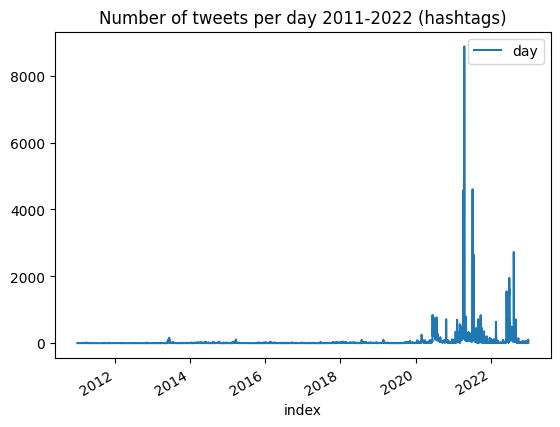

In [7]:
# concat all tweets from 2011-2022 in English into one dataframe
# 2020-2022 has been filtered
# make sure to perform the filtering before running this cell

all_years = pd.read_csv("data/filter/en/filtered_data0604.csv")
#all_years = all_years.loc[all_years["lang"] == "en"]

# change 'created_at' into datetime format and optionally set as index of dataframe

#all_years["created_at"] = pd.to_datetime(all_years["created_at"], format="%Y-%m-%dT%H:%M:%S")

#all_years = all_years.set_index("created_at")

#all_years

# reset index because some rows can have the same indices (due to merging)

all_years = all_years.reset_index(drop=True)
#all_years



# create a new dataframe where number of tweets is counted for each month

plot_days = pd.DataFrame(all_years["day"].value_counts())
#plot_days

# resetting the index to reorganize the rows and then setting the month to index again
# might be redundant here since the tweets should be in order already, but at least this makes the order from oldest to newest

plot_days = plot_days.reset_index()

plot_days["index"] = pd.to_datetime(plot_days["index"], format="%Y-%m-%d")

plot_days = plot_days.sort_values("index")

plot_days = plot_days.set_index("index")
#plot_days

# plotting the monthly distribution

plot_days.plot.line()
plt.title("Number of tweets per day 2011-2022 (hashtags)")
plt.savefig("pics/en filter/filtered_tweetsperday1104.png")

### 2011-2022 monthly graph (filtered_data0604.csv)

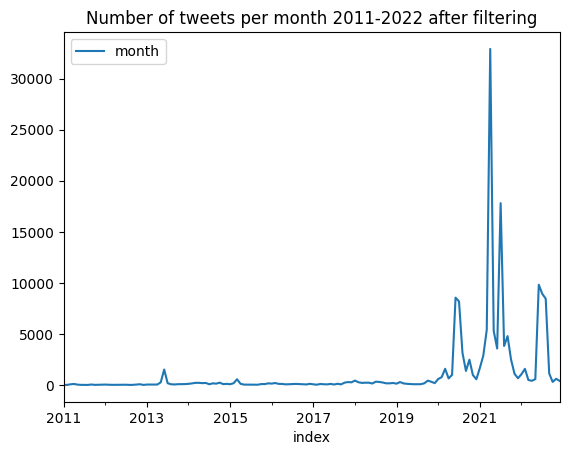

In [5]:
# concat all tweets from 2011-2022 in English into one dataframe
# 2020-2022 has been filtered
# make sure to perform the filtering before running this cell

all_years = pd.read_csv("data/filter/en/filtered_data0604.csv")
#all_years = all_years.loc[all_years["lang"] == "en"]

# change 'created_at' into datetime format and optionally set as index of dataframe

#all_years["created_at"] = pd.to_datetime(all_years["created_at"], format="%Y-%m-%dT%H:%M:%S")

#all_years = all_years.set_index("created_at")

#all_years

# reset index because some rows can have the same indices (due to merging)

#all_years = all_years.reset_index(drop=True)
#all_years

# creating a new column "month" from date's first 7 digits (yyyy-mm)

months = []

for i in range(len(all_years)):
    months.append(all_years["created_at"][i][:7])

#months[:5]

all_years["month"] = months
#all_years

# create a new dataframe where number of tweets is counted for each month

plot_months = pd.DataFrame(all_years["month"].value_counts())
#plot_months

# resetting the index to reorganize the rows and then setting the month to index again
# might be redundant here since the tweets should be in order already, but at least this makes the order from oldest to newest

plot_months = plot_months.reset_index()

plot_months["index"] = pd.to_datetime(plot_months["index"], format="%Y-%m")

plot_months = plot_months.sort_values("index")

plot_months = plot_months.set_index("index")
#plot_months

# plotting the monthly distribution

plot_months.plot.line()
plt.title("Number of tweets per month 2011-2022 after filtering")

plt.savefig("pics/en filter/filtered_hashtag_tweetspermonth1104.png")

### 2011-2022 monthly graph (filtered data 17.3.?)

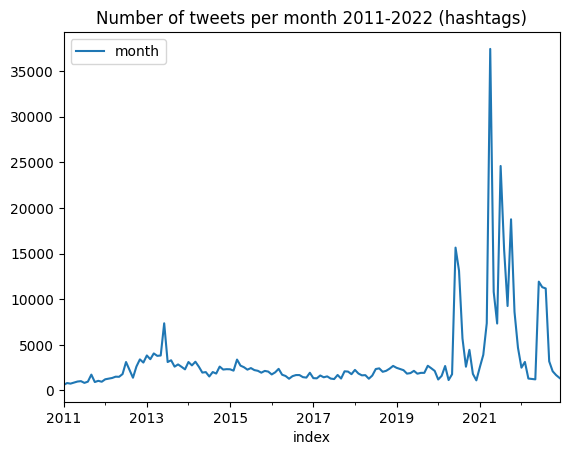

In [142]:
# concat all tweets from 2011-2022 in English into one dataframe
# 2020-2022 has been filtered
# make sure to perform the filtering before running this cell

filtered_all_years = [hashtags2011, hashtags2012, hashtags2013, hashtags2014, hashtags2015, hashtags2016, hashtags2017, hashtags2018, hashtags2019, filtered2]

all_years = pd.concat(filtered_all_years)
all_years = all_years.loc[all_years["lang"] == "en"]

# change 'created_at' into datetime format and optionally set as index of dataframe

#all_years["created_at"] = pd.to_datetime(all_years["created_at"], format="%Y-%m-%dT%H:%M:%S")

#all_years = all_years.set_index("created_at")

all_years

# reset index because some rows can have the same indices (due to merging)

all_years = all_years.reset_index(drop=True)
all_years

# creating a new column "month" from date's first 7 digits (yyyy-mm)

months = []

for i in range(len(all_years)):
    months.append(all_years["created_at"][i][:7])

months[:5]

all_years["month"] = months
all_years

# create a new dataframe where number of tweets is counted for each month

plot_months = pd.DataFrame(all_years["month"].value_counts())
plot_months

# resetting the index to reorganize the rows and then setting the month to index again
# might be redundant here since the tweets should be in order already, but at least this makes the order from oldest to newest

plot_months = plot_months.reset_index()

plot_months["index"] = pd.to_datetime(plot_months["index"], format="%Y-%m")

plot_months = plot_months.sort_values("index")

plot_months = plot_months.set_index("index")
plot_months

# plotting the monthly distribution

plot_months.plot.line()
plt.title("Number of tweets per month 2011-2022 (hashtags)")
plt.savefig("pics/filtered_hashtag_tweetspermonth030323.png")

### 2011-2022 daily graph (filtered data 2020-2022)

Text(0.5, 1.0, 'Number of tweets per day 2011-2022 (hashtags)')

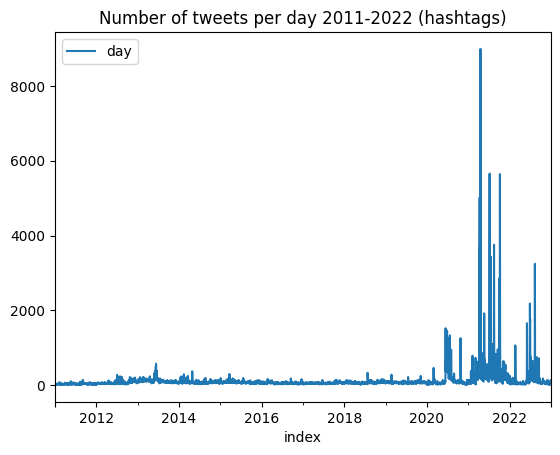

In [143]:
# concat all tweets from 2011-2022 in English into one dataframe
# 2020-2022 has been filtered
# make sure to perform the filtering before running this cell

filtered_all_years = [hashtags2011, hashtags2012, hashtags2013, hashtags2014, hashtags2015, hashtags2016, hashtags2017, hashtags2018, hashtags2019, filtered3]

all_years = pd.concat(filtered_all_years)
all_years = all_years.loc[all_years["lang"] == "en"]

# change 'created_at' into datetime format and optionally set as index of dataframe

#all_years["created_at"] = pd.to_datetime(all_years["created_at"], format="%Y-%m-%dT%H:%M:%S")

#all_years = all_years.set_index("created_at")

#all_years

# reset index because some rows can have the same indices (due to merging)

all_years = all_years.reset_index(drop=True)
#all_years

# creating a new column "month" from date's first 7 digits (yyyy-mm)

days = []

for i in range(len(all_years)):
    days.append(all_years["created_at"][i][:10])

#days[:5]

all_years["day"] = days
#all_years

# create a new dataframe where number of tweets is counted for each month

plot_days = pd.DataFrame(all_years["day"].value_counts())
#plot_days

# resetting the index to reorganize the rows and then setting the month to index again
# might be redundant here since the tweets should be in order already, but at least this makes the order from oldest to newest

plot_days = plot_days.reset_index()

plot_days["index"] = pd.to_datetime(plot_days["index"], format="%Y-%m-%d")

plot_days = plot_days.sort_values("index")

plot_days = plot_days.set_index("index")
#plot_days

# plotting the monthly distribution

plot_days.plot.line()
plt.title("Number of tweets per day 2011-2022 (hashtags)")
#plt.savefig("pics/hashtag_tweetsperday.png")

### Busiest tweet days (outdated; does the same as the function get_daily_tweet_counts)

In [ ]:
plot_days

,day
index,
2011-01-01,7
2011-01-02,3
2011-01-03,4
2011-01-04,8
2011-01-05,5
...,...
2022-12-27,30
2022-12-28,27
2022-12-29,19


In [39]:
# nimeä plot_days:n "index" nimellä "created_at" jotta yhdistäminen onnistuu
plot_days = plot_days.reset_index()
plot_days

,index,day
0,2011-01-01,7
1,2011-01-02,3
2,2011-01-03,4
3,2011-01-04,8
4,2011-01-05,5
...,...,...
4378,2022-12-27,30
4379,2022-12-28,27
4380,2022-12-29,19
4381,2022-12-30,132


In [40]:
plot_days.rename(columns = {"day" : "count"}, inplace=True)
plot_days.rename(columns = {"index" : "day"}, inplace=True)

In [41]:
plot_days

,day,count
0,2011-01-01,7
1,2011-01-02,3
2,2011-01-03,4
3,2011-01-04,8
4,2011-01-05,5
...,...,...
4378,2022-12-27,30
4379,2022-12-28,27
4380,2022-12-29,19
4381,2022-12-30,132


In [35]:
len(plot_days)+len(all_years)

378370

In [42]:
plot_days["day"] = plot_days["day"].dt.strftime("%Y-%m-%d")

In [43]:
# merge the information from plot_days (count of tweets per day) to a new dataframe
# each row has information about how many tweets were posted that day

busiest_days = pd.merge(all_years, plot_days, how="left", on="day")
busiest_days

,created_at,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description,user.url,in_reply_to_user_id,day,count
0,2011-01-01T23:27:35.000Z,21346828930785280,189332313,21346828930785280,everyone,Treasures of the Nile by atouchoftwist on @Ets...,en,0,0,0,...,189332313,atouchoftwist,https://pbs.twimg.com/profile_images/112130699...,2010-09-11T00:12:57.000Z,Florida,A Touch of Twist is the Etsy shop for some of ...,NaN,NaN,2011-01-01,7
1,2011-01-01T23:19:09.000Z,21344707376320512,138931028,21344707376320512,everyone,The #NILE Aint Just A River In France...huh? lol,en,0,0,0,...,138931028,rukidd_,https://pbs.twimg.com/profile_images/159703526...,2010-05-01T02:00:39.000Z,Brazil,"Promise To Always Give You Me, The Real Me So ...",NaN,NaN,2011-01-01,7
2,2011-01-01T19:55:16.000Z,21293396903596033,141079255,21293396903596033,everyone,Who wins? Prevacid VS. (Coffee + Tequila + Cha...,en,0,0,0,...,141079255,NoLimitDoc,https://pbs.twimg.com/profile_images/604065133...,2010-05-07T04:02:58.000Z,Las Vegas,"Father, Husband, Physician and Poker Player.",NaN,NaN,2011-01-01,7
3,2011-01-01T15:57:56.000Z,21233673399435264,23566545,21233673399435264,everyone,Sloop over to progression and set your own sai...,en,0,0,0,...,23566545,justroxonmute,https://pbs.twimg.com/profile_images/452360943...,2009-03-10T07:03:51.000Z,Imagination land of no limits,Automotive-Photography-Music-Gym-Gaming… in a ...,NaN,NaN,2011-01-01,7
4,2011-01-01T02:44:01.000Z,21033875283124225,230475530,21033875283124225,everyone,Procucts: http://www.bb-care.com/under-the-nil...,en,0,0,0,...,230475530,bbcarecom,https://pbs.twimg.com/profile_images/119904971...,2010-12-25T16:18:06.000Z,None,None,NaN,NaN,2011-01-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373982,2022-12-31T03:49:12.000Z,1609033906845810692,198811065,1609033906845810692,everyone,"#NileCruise, #HighDam, #PhilaeTemple, #Unfinis...",en,1,2,42,...,198811065,tracylager,https://pbs.twimg.com/profile_images/140710864...,2010-10-05T09:25:49.000Z,Ottawa Ontario,"It’s Lager, like beer 🍺. Air traffic controlle...",None,NaN,2022-12-31,44
373983,2022-12-31T03:47:56.000Z,1609033588686852102,198811065,1609033588686852102,everyone,"#NileCruise, #HighDam, #PhilaeTemple, #Unfinis...",en,0,4,43,...,198811065,tracylager,https://pbs.twimg.com/profile_images/140710864...,2010-10-05T09:25:49.000Z,Ottawa Ontario,"It’s Lager, like beer 🍺. Air traffic controlle...",None,NaN,2022-12-31,44
373984,2022-12-31T03:46:10.000Z,1609033143037689857,164977179,1609033143037689857,everyone,Constructing large dams like GERD contributes ...,en,0,0,0,...,164977179,amelmest,https://pbs.twimg.com/profile_images/157105393...,2010-07-10T07:06:32.000Z,"Addis Ababa, Ethiopia","Managing Partner, MAKE Enterprise LLC",None,NaN,2022-12-31,44
373985,2022-12-31T01:52:09.000Z,1609004449900683266,244537730,1609004449900683266,everyone,Straight leg raising improves the diagnostic y...,en,0,0,1,...,244537730,justntweet,https://pbs.twimg.com/profile_images/156933374...,2011-01-29T14:55:39.000Z,"Kelantan, Malaysia","MD, PhD, FAMM, FACP, FRCP, FACG, AGAF, FASc. P...",https://t.co/g0YdOL43Z8,NaN,2022-12-31,44


In [62]:
busiest_days.loc[busiest_days["day"] == "2021-04-18"]["text"].to_list()

["🇪🇹''We are using 🇪🇹our legal @opportunity to build the tomorrow we want''  the result of our today's hard work will positive \n#FilltheGERD🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹💪💪 https://t.co/17zQdxVzve",
 '60% of the #Ethiopian population has no access to electricity. #GERD will generate over 6500 Megawatts of hydropower. #Ethiopia needs this energy to lift its people out of poverty.  @AUChair2021 @AUC_MoussaFaki @AbiyAhmed  @PresidentAlSisi #DoUntoOthers @maddow #UnityforEthiopia',
 '#GERD offers hope for the greater #Africa. The population is exploding &amp; resources are shrinking. #Egypt &amp; #Sudan should not block the #GERD for the sake of #Africa. #FillTheDam @AUChair2021 @FareedZakaria #UnityforEthiopia',
 '#Egypt stop sabotaging #Ethiopia! #GERD is in #Benshanul. There’s a continuous attack on civilians. A great deal of attention is needed for peace and stability of the region Protect #HOA  #UnityforEthiopia @AfricanUnion @AUChair2021 @AUC_MoussaFaki  @UN @EU_Commission @POTUS',
 'The #GERD should b

In [52]:
top_days = plot_days.sort_values("count", ascending=False)[:100]
top_days

,day,count
3760,2021-04-18,8995
3841,2021-07-08,5658
3932,2021-10-07,5645
3753,2021-04-11,5017
3752,2021-04-10,3869
...,...,...
3843,2021-07-10,513
3981,2021-11-25,513
3767,2021-04-25,512
3883,2021-08-19,509


## Languages used

In [9]:
lang11 = hashtags2011[["lang"]]
lang12 = hashtags2012[["lang"]]
lang13 = hashtags2013[["lang"]]
lang14 = hashtags2014[["lang"]]
lang15 = hashtags2015[["lang"]]
lang16 = hashtags2016[["lang"]]
lang17 = hashtags2017[["lang"]]
lang18 = hashtags2018[["lang"]]
lang19 = hashtags2019[["lang"]]
lang20 = hashtags2020[["lang"]]
lang21 = hashtags2021[["lang"]]
lang22 = hashtags2022[["lang"]]

In [31]:
#DatetimeIndex
from datetime import datetime

# created_at: 2011-01-01T23:27:35.000Z

#dt = datetime.strptime(hashtags2011["created_at"], '%Y-%m-%dT%H:%M:%S0Z')
hashtags2011["created_at"] = pd.to_datetime(hashtags2011["created_at"], format="%Y-%m-%dT%H:%M:%S0Z")

ValueError: time data '2011-01-01T23:27:35.000Z' does not match format '%Y-%m-%dT%H:%M:%S0Z' (match)

In [26]:
#2011
#lang11["lang"].value_counts()
lang11["lang"].resample("D").count().hvplot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [40]:
#2012
lang11["lang"].value_counts()

en     5940
ar      499
nl      197
qme     165
in      160
und      95
pt       79
es       68
de       66
tl       53
qht      51
fr       42
tr       32
ja       28
et       13
it       11
sv       11
ht       11
ca        9
th        9
no        8
ro        8
da        5
fi        5
cs        4
cy        4
pl        3
hi        3
eu        2
ne        1
hu        1
lt        1
ru        1
lv        1
am        1
iw        1
Name: lang, dtype: int64

In [11]:
#2013
lang13.describe()

,lang
count,26735
unique,41
top,en
freq,21652


In [12]:
#2014
lang14.describe()

,lang
count,20732
unique,46
top,en
freq,15213


# Exploring data

## Reading some tweets

In [8]:
# search for stringsof text in a specified language, strings need to be edited on second to last line of code

# regex in str.contains can be set to True or False (depending on whether string is regular expression or literal string)

lang = "en"

italian = hashtags2015.loc[(hashtags2015["text"].str.lower().str.contains("ethiopian dam crisis: agreement reached between #egypt, #ethiopia and #sudan"))]

In [10]:
italian["text"].to_list()

['Ethiopian Dam Crisis: Agreement Reached Between #Egypt, #Ethiopia and #Sudan https://t.co/AnRYoXycYW #GERD']

In [4]:
print("unique contents / all tweets / amount of repetition")
print(italian["text"].nunique(), len(italian["text"]), 1-italian["text"].nunique()/len(italian["text"]))

unique contents / all tweets / amount of repetition
1394 2319 0.39887882708063815


In [5]:
len(italian)

2319

In [8]:
sum(italian["user.location"].value_counts())

1158

## Sensitive Tweets

variables need to be changed

In [73]:
sensitive = hashtags.loc[hashtags["possibly_sensitive"] == True]
#sensitive.head()

In [74]:
all = len(sensitive)

In [75]:
len(sensitive["text"].unique())

2

In [76]:
sensitive.head()["text"].to_list()

['تقرير عن احداث النيل الازرق يحمل الكثير من الموعظة و الحكمة و اللغة و المضمون  http://t.co/5vVasSF via #bluenile #sudan #ssudan #kordofan',
 '@Mymomsacougar http://t.co/NkFNH9FG - that #fat woman needs to go to a #safari Park in #kenya #africa she is related to the #nile #hipp']

In [77]:
sensitive.head(60)["lang"]

4684    ar
6061    en
Name: lang, dtype: object

# Number of tweets/year after filtering (filtered_data1703.csv)

In [1]:
import pandas as pd
import numpy as np

fp = "data/filter/en/filtered_data1703.csv"

df_all = pd.read_csv(fp)

In [17]:
#df = df_all.loc[df_all["created_at"].str.contains("2022")]
year = 2011

for i in  range(12):
    print(year, ":", len(df_all.loc[df_all["created_at"].str.contains(str(year))]))
    year += 1

len(df)

2011 : 4826
2012 : 9039
2013 : 14721
2014 : 11166
2015 : 9758
2016 : 9088
2017 : 8114
2018 : 10831
2019 : 11247
2020 : 51851
2021 : 103638
2022 : 46860


46860